#  **Explaining the Dataset**
 We took a dataset containing numerous tweets from the twitter users. And here our aim is to detect or rather the better term would be to predict the depression amongst them. Here, first we will import some of the library frequently used to import data and perform some of the basic data operation. So for simplicity, we will import pandas for EDA, matplotlib and seaborn for visualization, os for operating system operations. 

In [1]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/mental-health-social-media/Mental-Health-Twitter.csv


In [2]:
data=pd.read_csv("/kaggle/input/mental-health-social-media/Mental-Health-Twitter.csv",index_col=0)

In [3]:
data.head()

,post_id,post_created,post_text,user_id,followers,friends,favourites,statuses,retweets,label
0,637894677824413696,Sun Aug 30 07:48:37 +0000 2015,It's just over 2 years since I was diagnosed w...,1013187241,84,211,251,837,0,1
1,637890384576778240,Sun Aug 30 07:31:33 +0000 2015,"It's Sunday, I need a break, so I'm planning t...",1013187241,84,211,251,837,1,1
2,637749345908051968,Sat Aug 29 22:11:07 +0000 2015,Awake but tired. I need to sleep but my brain ...,1013187241,84,211,251,837,0,1
3,637696421077123073,Sat Aug 29 18:40:49 +0000 2015,RT @SewHQ: #Retro bears make perfect gifts and...,1013187241,84,211,251,837,2,1
4,637696327485366272,Sat Aug 29 18:40:26 +0000 2015,It’s hard to say whether packing lists are mak...,1013187241,84,211,251,837,1,1


#  Giving an overview of the data and getting simple data understanding 
Here the data  contains columns like post_created which is a date-time data, post-text which is a text data corpus from the actual tweets, user_id,post_id, followers and friends of the respective data. The count of favorite contents of the user in twitter as well as their status, retweets, and the output as label which determines that this is a problem of a supervised learning.  

<AxesSubplot:xlabel='label', ylabel='count'>

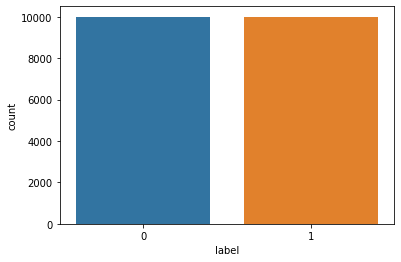

In [4]:
sns.countplot(data=data,x='label')

From the above plot, it is obvious that the dataset is balanced which means that the number of depressed people and non-depressed people are appearing to be equally distributed in this specific dataset.

In [5]:
import re
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...


True

We here are going to take up an approach of natural language processing. So we will be importing re module which is a regular expression modules and nltk module which is an NLP library for working with the text.

In [6]:
nltk.download("stopwords")
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
lemm=nltk.WordNetLemmatizer()

In [8]:
text_list=[]
for text in data.post_text:
    des=re.sub('[^A-Za-z]',' ',text)
    des=des.lower()
    des=nltk.word_tokenize(text)
    des=[lemm.lemmatize(word) for word in text]
    des=''.join(des)
    text_list.append(des)

# Operations performed in the post_text dataset
In this, we first removed the words without letters, and also the random white spaces are removed used regular expressions. Next we changed the words into lowercase so that all the words get in equal composition. Then we performed the word_tokenizer so that the words are converted into tokens. Then we cleaning the extra words using lemmatizer. And further joined the word obtained in the text_list.

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer=CountVectorizer(max_features=800,stop_words="english")
sparce_matrix=count_vectorizer.fit_transform(text_list).toarray()

In [10]:
X=sparce_matrix
y=data['label'].values

In [11]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

# Applying Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [13]:
print('The train Score for Logistic Regression is: ',lr.score(X_train,y_train))
print('The test score for Logistic Regression is: ', lr.score(X_test,y_test))

The train Score for Logistic Regression is:  0.8424285714285714
The test score for Logistic Regression is:  0.7995


# Applying Support Vector Machine

In [14]:
from sklearn.svm import SVC
sv=SVC(C=0.73,kernel='rbf',degree=4)

In [15]:
sv.fit(X_train,y_train)

SVC(C=0.73, degree=4)

In [16]:
sv.score(X_train,y_train)


0.8947857142857143

In [17]:
sv.score(X_test,y_test)

0.8033333333333333

# Applying Deep Learning Techniques

In [18]:
from tensorflow import keras
import tensorflow as tf

In [19]:
model = keras.Sequential(
    [
        tf.keras.layers.Dense(512, activation="relu", name="layer1"),
        tf.keras.layers.Dense(512, activation="relu", name="layer2"),
        tf.keras.layers.Dense(2, name="layer3"),
    ]
)

2022-08-26 19:33:47.392473: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [20]:
model.compile(optimizer="Adam", loss="mse", metrics=["mae"])

In [21]:
history=model.fit(X_train, y_train, epochs=50, verbose=1)

2022-08-26 19:33:47.711575: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50
438/438 [==============================] - 3s 6ms/step - loss: 0.1445 - mae: 0.3016
Epoch 2/50
438/438 [==============================] - 2s 5ms/step - loss: 0.1007 - mae: 0.2292
Epoch 3/50
438/438 [==============================] - 2s 5ms/step - loss: 0.0766 - mae: 0.1885
Epoch 4/50
438/438 [==============================] - 3s 7ms/step - loss: 0.0582 - mae: 0.1550
Epoch 5/50
438/438 [==============================] - 2s 5ms/step - loss: 0.0451 - mae: 0.1236
Epoch 6/50
438/438 [==============================] - 2s 5ms/step - loss: 0.0377 - mae: 0.1015
Epoch 7/50
438/438 [==============================] - 2s 5ms/step - loss: 0.0350 - mae: 0.0923
Epoch 8/50
438/438 [==============================] - 2s 5ms/step - loss: 0.0336 - mae: 0.0886
Epoch 9/50
438/438 [==============================] - 2s 5ms/step - loss: 0.0319 - mae: 0.0842
Epoch 10/50
438/438 [==============================] - 2s 5ms/step - loss: 0.0314 - mae: 0.0832
Epoch 11/50
438/438 [============================

In [22]:
loss, acc = model.evaluate(X_test, y_test, verbose=1)

188/188 [==============================] - 1s 3ms/step - loss: 0.1491 - mae: 0.2253


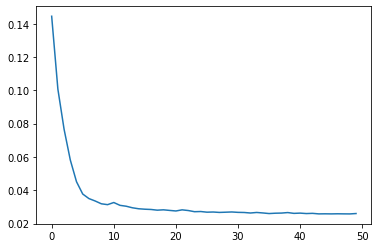

In [23]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],label='X_train')
